# Chaotic Motion of Point Vortices in a Doubly Periodic 2D Domain

### Initial Imports

In [6]:
import jax
import jax.numpy as jnp
from jax import jit
import VorticesMotionPeriodic as vm
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from jax.config import config
config.update("jax_enable_x64", True)

In [7]:
L = 1.               # size of the square domain

outer_steps = 100             # Number of frames to plot in animation to integrate over
inner_steps = 10              # Number of time steps between frames shown in animation
dt = 0.001                    # size of time step 

<IPython.core.display.Javascript object>


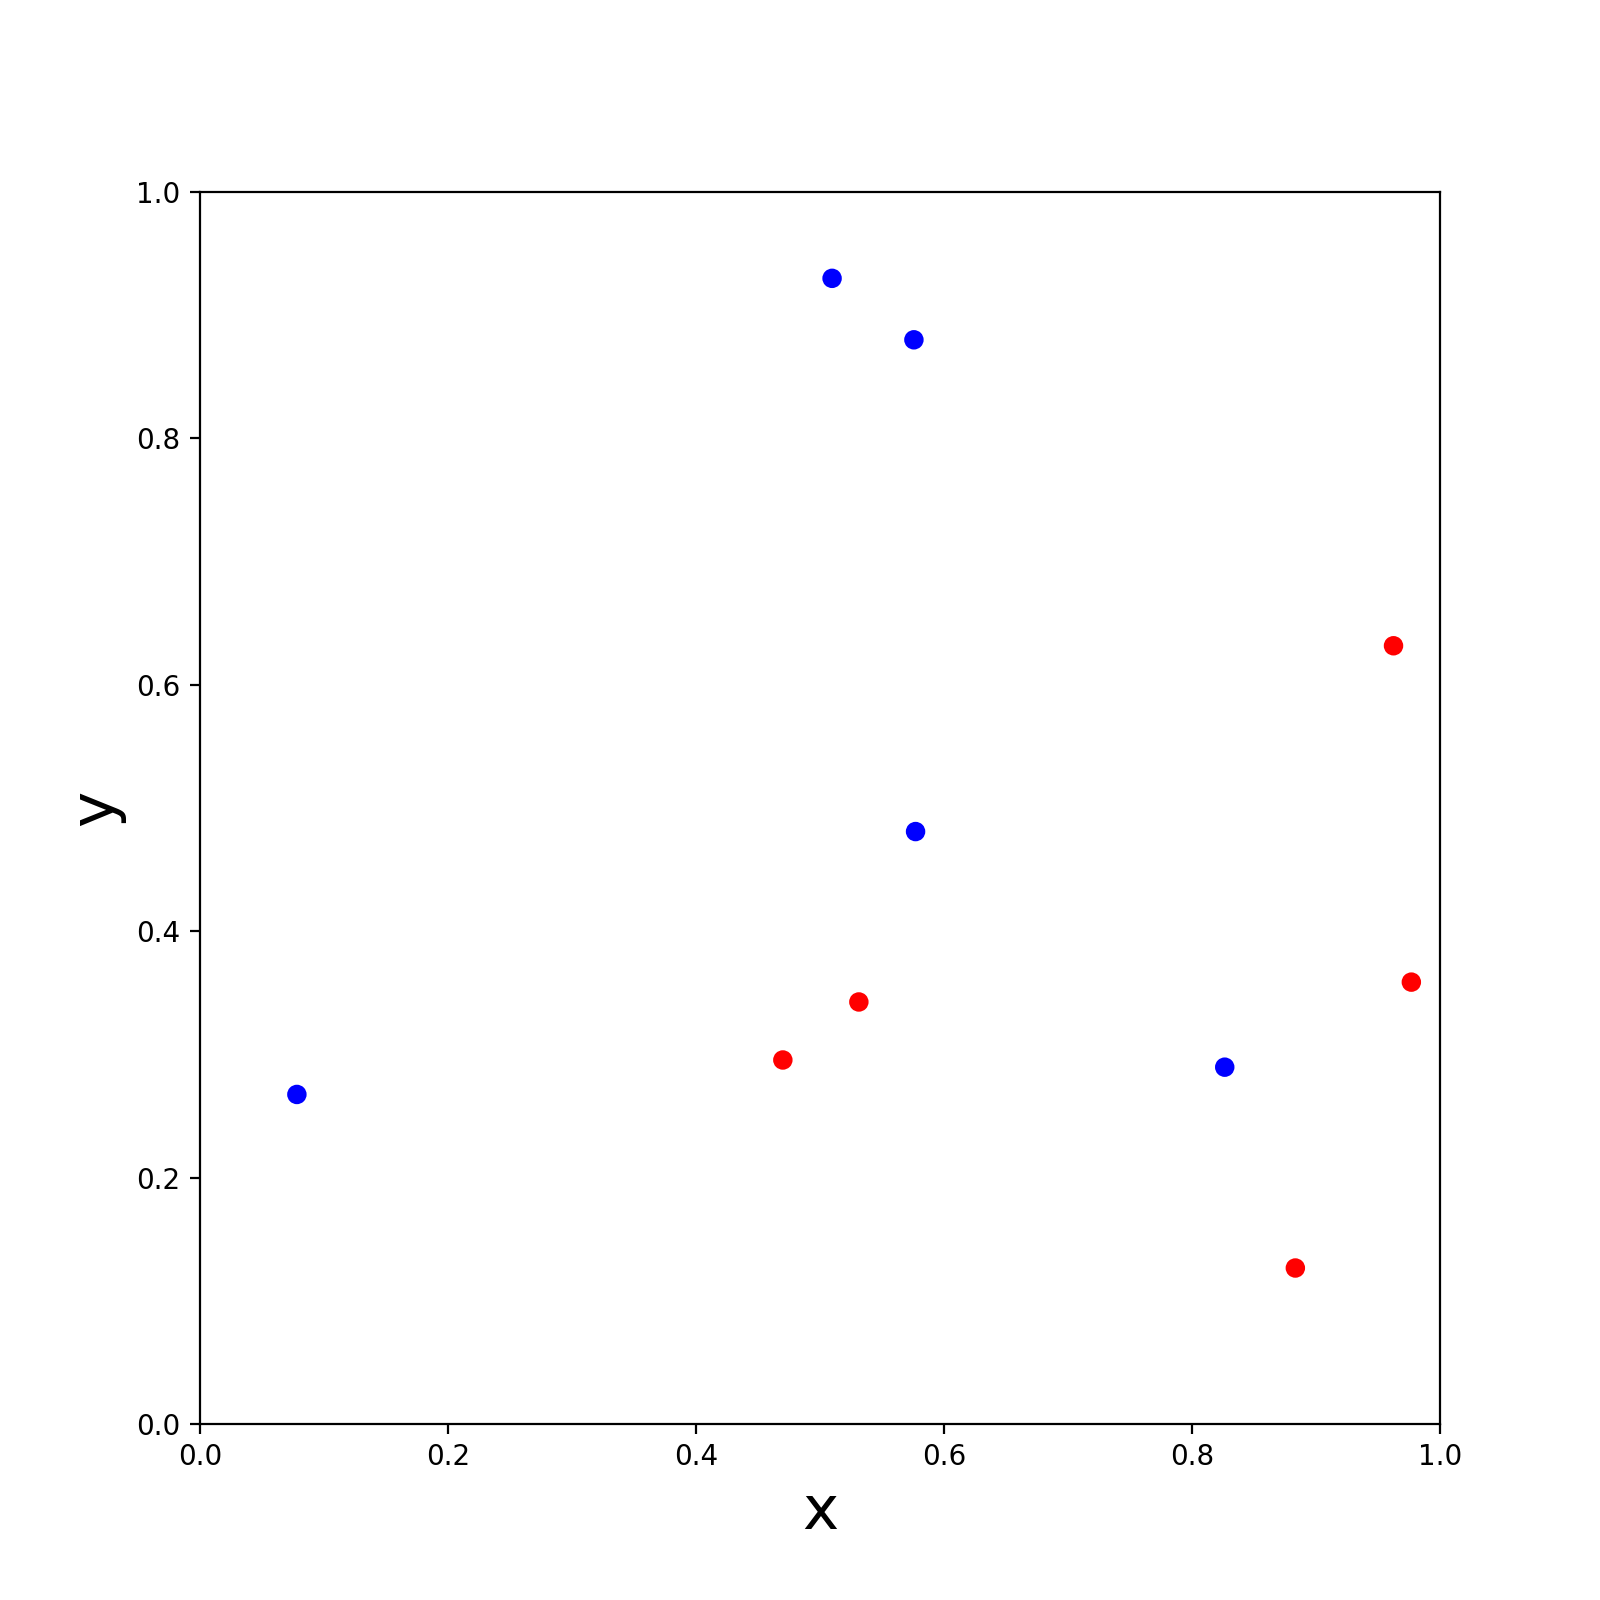

In [8]:
%matplotlib notebook

# Try chaotic n = 10 system

n = 10               # number of vortices

# Randomly initialise the doubly periodic point vortex system.
key = jax.random.PRNGKey(0)
state = jax.random.uniform(key, (2*n,), minval=0., maxval=L)

# Set half the vortices to circulation = 1, half to -1
gammas = jnp.array([1.]*5 + [-1.]*5)
system = vm.PeriodicVortices(state, gammas, L)

colors = ['r']*5 + ['b']*5

figanim, axanim = plt.subplots(figsize=(4,4))
axanim.set_xlim([0, L])
axanim.set_ylim([0, L])
axanim.set_xlabel('x', fontsize=22)
axanim.set_ylabel('y', fontsize=22)

scat = axanim.scatter(system.state[:n], system.state[n:], c=colors)

def animate(i):
    
    system.rk2_finalN(dt, inner_steps)
    scat.set_offsets(np.c_[system.state[:n], system.state[n:]])
    return scat, 

a1 = animation.FuncAnimation(figanim, animate, frames = outer_steps, repeat=True, interval = 100)

<IPython.core.display.Javascript object>


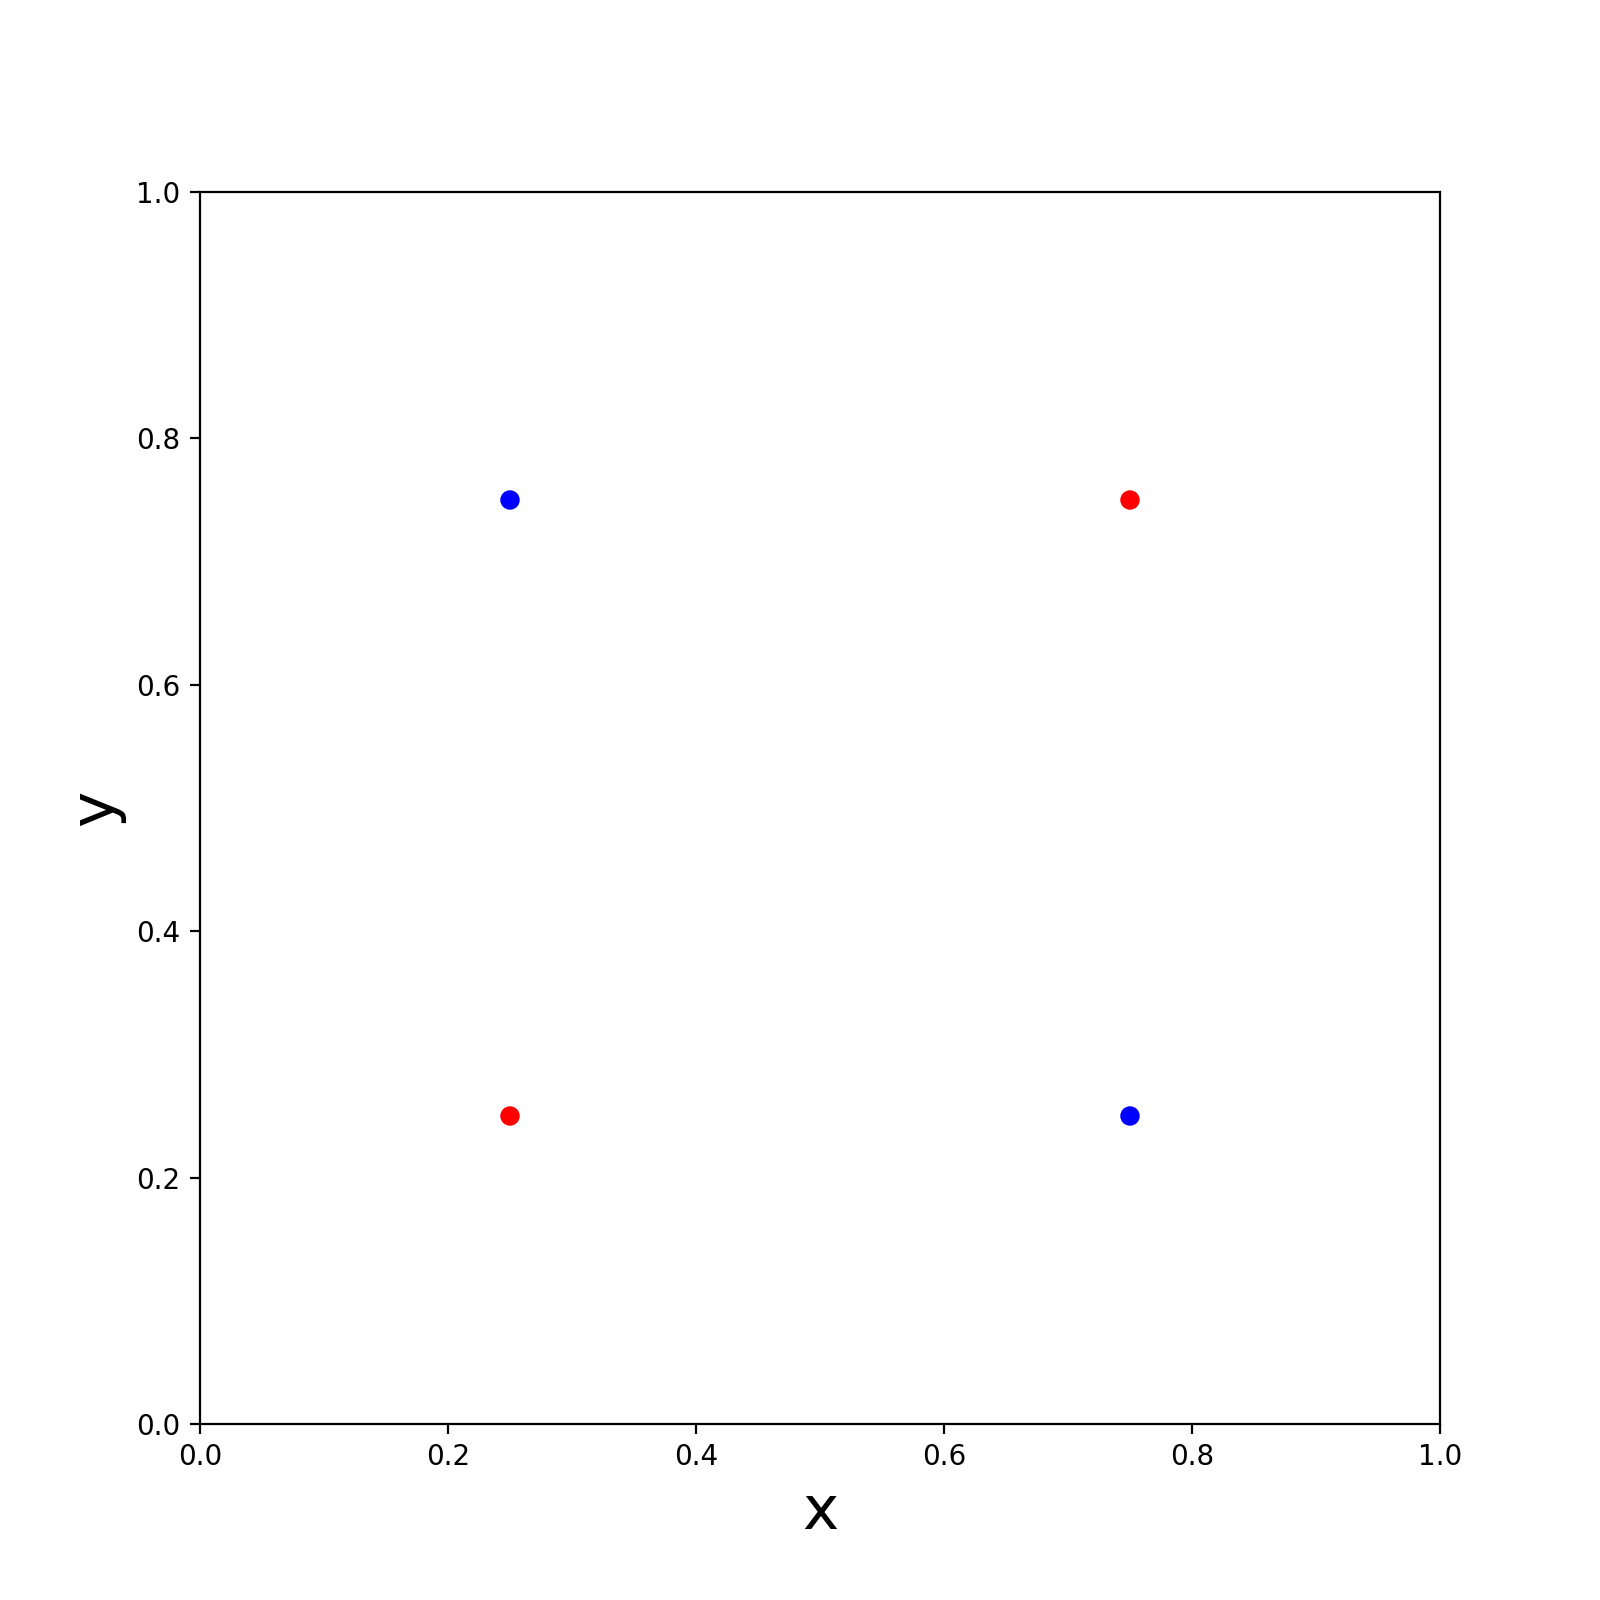

In [9]:
# Try the N = 4 polygon equilibrium

n = 4
state = jnp.array([0.25, 0.25, 0.75, 0.75, 0.25, 0.75, 0.25, 0.75])
gammas = jnp.array([1, -1, -1, 1])
system = vm.PeriodicVortices(state, gammas, L)

colors = ['r', 'b', 'b', 'r']

figanim, axanim = plt.subplots(figsize=(4,4))
axanim.set_xlim([0, L])
axanim.set_ylim([0, L])
axanim.set_xlabel('x', fontsize=22)
axanim.set_ylabel('y', fontsize=22)

scat = axanim.scatter(system.state[:n], system.state[n:], c=colors)

def animate(i):
    
    system.rk2_finalN(dt, inner_steps)
    scat.set_offsets(np.c_[system.state[:n], system.state[n:]])
    return scat, 

a2 = animation.FuncAnimation(figanim, animate, frames = outer_steps, repeat=True, interval = 100)